In [ ]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

cap.set(cv2.CAP_PROP_FRAME_WIDTH,640);
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,480);

while True:
    ret, frame = cap.read()
    result = DeepFace.analyze(frame, actions = ['emotion'])
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, result['dominant_emotion'], (50, 50), font, 3, (0, 0, 255), 2, cv2.LINE_4)
    cv2.imshow('Original video', frame)
#     print(result)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

(-0.5, 491.5, 365.5, -0.5)

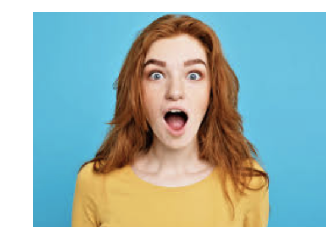

In [28]:
image_path = './images/'
image = cv2.cvtColor(cv2.imread(image_path + 'face4.png'), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')

In [29]:
pred = DeepFace.analyze(image, actions=['emotion'])
pred

{'emotion': {'angry': 9.387349151810954,
  'disgust': 9.54730462750743e-08,
  'fear': 60.95484858482173,
  'happy': 9.474238572969352,
  'sad': 0.01936983869147457,
  'surprise': 20.164178023587347,
  'neutral': 1.635539161667743e-05},
 'dominant_emotion': 'fear'}